In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cardio_df=pd.read_csv('/content/drive/MyDrive/ANALISA KASUS/Cardiovascular_Disease_Dataset.csv',index_col='patientid')
cardio_df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
patientid,,,,,,,,,,,,,
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
cardio_df.isnull().sum()

age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [6]:
cardio_df.duplicated().sum()

0

In [7]:
cardio_df.shape

(1000, 13)

In [8]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 103368 to 9990855
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 109.4 KB


In [9]:
cardio_df.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [10]:
cardio_corr=cardio_df.corr()
mask=np.triu(np.ones_like(cardio_corr,dtype=bool))

Text(0.5, 1.0, 'correlation matrics')

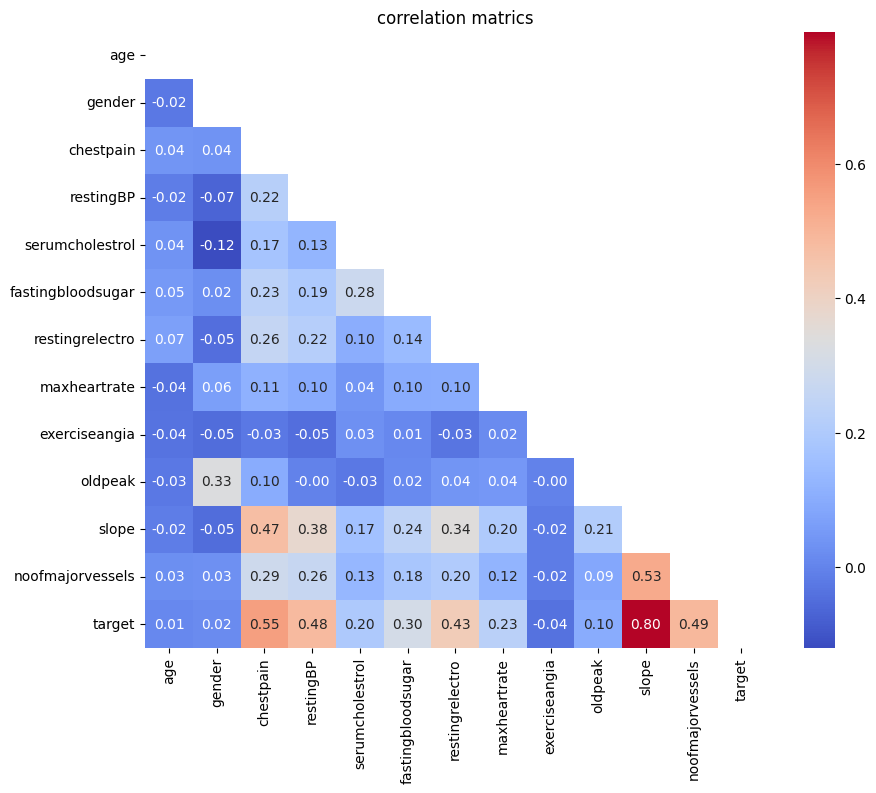

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(cardio_corr,annot=True,cmap='coolwarm',mask=mask,fmt='.2f')
plt.title('correlation matrics')

In [12]:
copy_df=cardio_df.copy(deep=True)

In [13]:
copy_df.replace({'gender':{0:'female',1:'male'},'target':{0:'absence',1:'presence'}},inplace=True)

In [14]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 103368 to 9990855
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   object 
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   object 
dtypes: float64(1), int64(10), object(2)
memory usage: 109.4+ KB


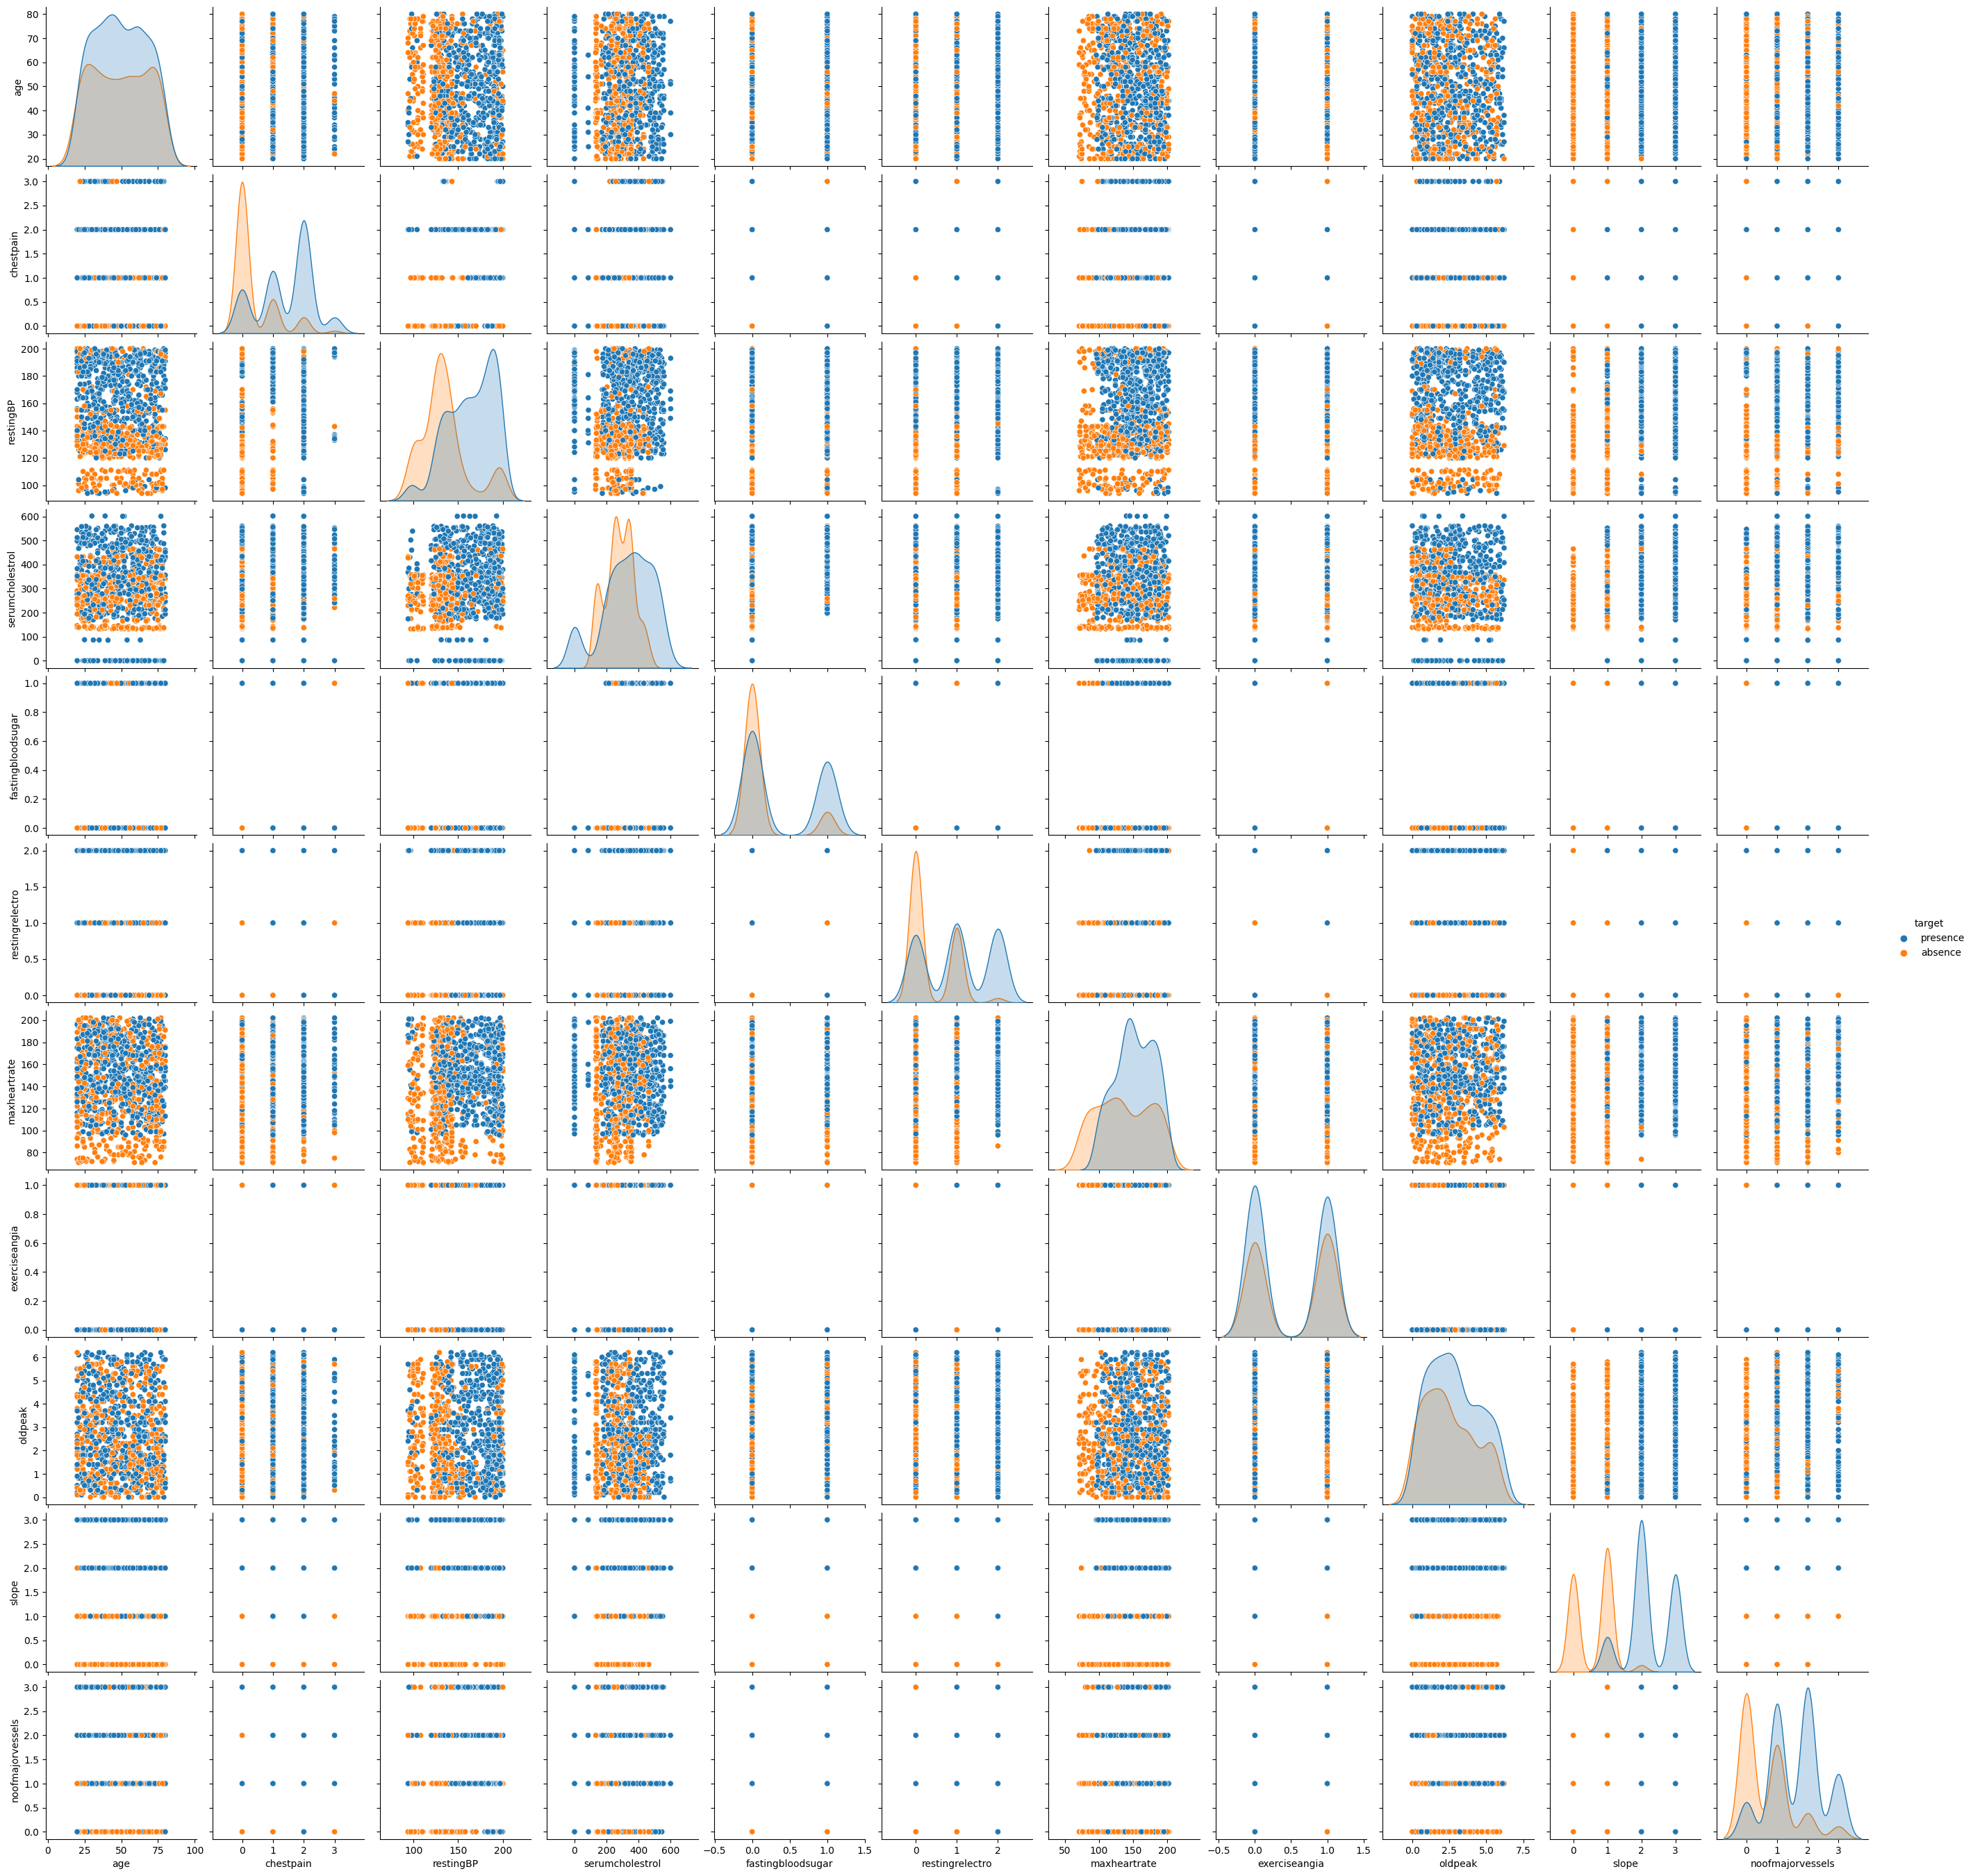

In [15]:
sns.pairplot(copy_df,hue='target')

Text(0.5, 1.0, 'distribution age of patient')

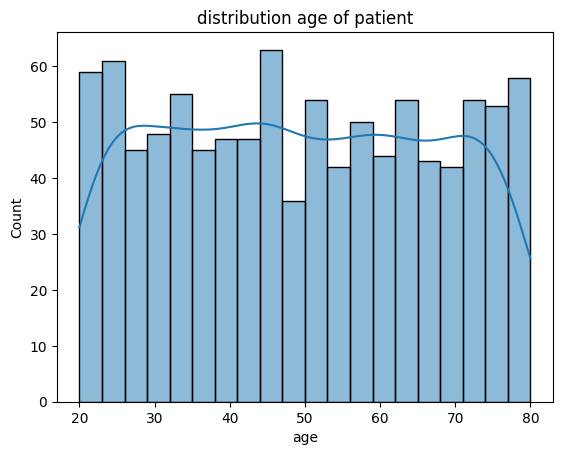

In [16]:
sns.histplot(copy_df['age'],bins=20,kde=True)
plt.title('distribution age of patient')

In [28]:
copy_df['gender'].value_counts()

male      765
female    235
Name: gender, dtype: int64

In [31]:
male_percentage=(((copy_df['gender']=='male').sum())*100)/1000
female_percentage=(((copy_df['gender']=='female').sum())*100)/1000
print(male_percentage)
print(female_percentage)

76.5
23.5


In [33]:
gender_group=copy_df.groupby('gender')['target'].value_counts()
gender_group

gender  target  
female  presence    133
        absence     102
male    presence    447
        absence     318
Name: target, dtype: int64

Text(0.5, 1.0, 'countplot of gender with target')

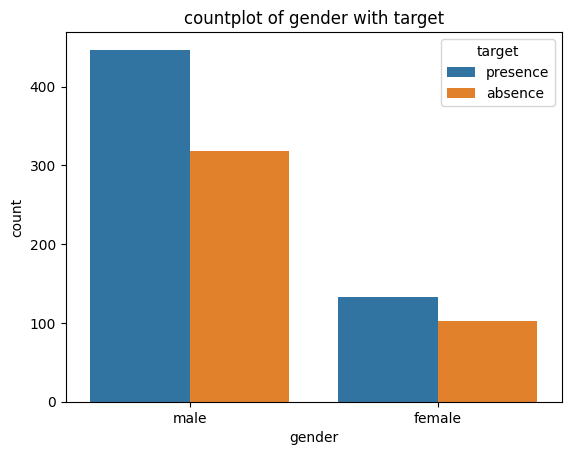

In [17]:
sns.countplot(data=copy_df,x='gender',hue='target')
plt.title('countplot of gender with target')

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:


X=cardio_df.drop(columns='target')
y=copy_df['target']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_pred=model.predict(X_test)

In [23]:
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.9833333333333333

array([[136,   2],
       [  3, 159]])

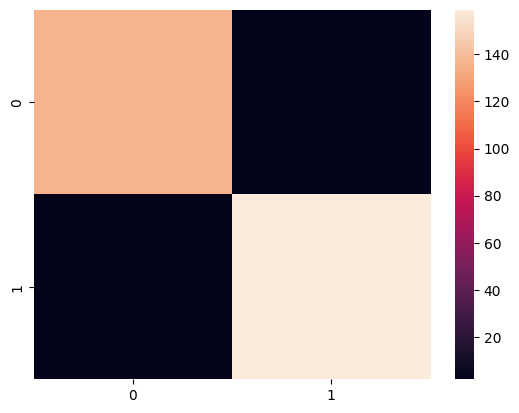

In [24]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)
cm

In [25]:
class_report=classification_report(y_test,y_pred)
class_report

'              precision    recall  f1-score   support\n\n     absence       0.98      0.99      0.98       138\n    presence       0.99      0.98      0.98       162\n\n    accuracy                           0.98       300\n   macro avg       0.98      0.98      0.98       300\nweighted avg       0.98      0.98      0.98       300\n'

In [26]:
import joblib

In [27]:
joblib.dump(model,'RFC_cardio.joblib')

['RFC_cardio.joblib']